# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
pip install PalmerPenguins

In [2]:
pip install scikit-learn

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
# Import required packages
import pandas as pd
import seaborn as sns

# Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

# Display the first few rows
print("First few rows of the dataset:")
print(penguins.head())

# Check for missing values
print("\nMissing values per column:")
print(penguins.isnull().sum())

# Drop rows with missing values (simplifies modeling)
penguins_clean = penguins.dropna()

# Dummify categorical variables
penguins_dummified = pd.get_dummies(penguins_clean, drop_first=True)

# Show the dummified dataset
print("\nDummified dataset preview:")
print(penguins_dummified.head())


First few rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Missing values per column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Dummified dataset preview:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1

In [4]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

     Model  # Predictors  Train MSE  Test MSE
0  Model 1             1   3.543453  3.952500
1  Model 2             2   2.227580  2.939999
2  Model 3             3   2.224021  2.915749
3  Model 4             8   0.517373  0.864531


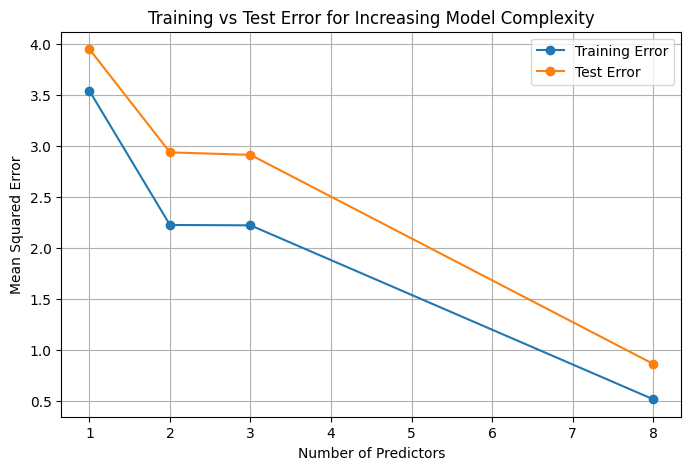

In [6]:
# ========================================
# PALMER PENGUINS MODEL VALIDATION EXAMPLE
# ========================================

# 1. Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Load and clean the dataset
penguins = sns.load_dataset("penguins").dropna()
penguins_dummified = pd.get_dummies(penguins, drop_first=True)

# 3. Define the response variable
y = penguins_dummified["bill_depth_mm"]

# 4. Prepare four models with increasing complexity
# Model 1: bill_length_mm only
X1 = penguins_dummified[["bill_length_mm"]]

# Model 2: bill_length_mm + flipper_length_mm
X2 = penguins_dummified[["bill_length_mm", "flipper_length_mm"]]

# Model 3: add body_mass_g
X3 = penguins_dummified[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]

# Model 4: all remaining predictors
X4 = penguins_dummified.drop(columns="bill_depth_mm")

# 5. Split into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.3, random_state=42)

# 6. Fit models and compute MSE
results = []

for i, (Xtr, Xte, ytr, yte) in enumerate(
    [(X_train1, X_test1, y_train1, y_test1),
     (X_train2, X_test2, y_train2, y_test2),
     (X_train3, X_test3, y_train3, y_test3),
     (X_train4, X_test4, y_train4, y_test4)]
):
    model = LinearRegression()
    model.fit(Xtr, ytr)

    y_pred_train = model.predict(Xtr)
    y_pred_test = model.predict(Xte)

    train_mse = mean_squared_error(ytr, y_pred_train)
    test_mse = mean_squared_error(yte, y_pred_test)

    results.append({
        "Model": f"Model {i+1}",
        "# Predictors": Xtr.shape[1],
        "Train MSE": train_mse,
        "Test MSE": test_mse
    })

# 7. Create a results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# 8. Plot training vs. test error
plt.figure(figsize=(8,5))
plt.plot(results_df["# Predictors"], results_df["Train MSE"], 'o-', label="Training Error")
plt.plot(results_df["# Predictors"], results_df["Test MSE"], 'o-', label="Test Error")

plt.xlabel("Number of Predictors")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error for Increasing Model Complexity")
plt.legend()
plt.grid(True)
plt.show()
